# Learning slowdown
## Alicia Brown
### 143960

#### Paquetes necesarios

In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### Red neuronal 2 - 1- 1 - 1 

In [13]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])
input_size=2
middle_size = 1
middle_size2 = 1
output_layer_size=1

x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size])

In [14]:
W_layer1 = tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1")

W_layer2 = tf.Variable(tf.random_uniform([middle_size,middle_size2], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([middle_size2]), name="b_layer2")

W_layer3 = tf.Variable(tf.random_uniform([middle_size2,output_layer_size], -1, 1), name="W_layer3")
b_layer3 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer3")

In [15]:
y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) 
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)
init = tf.global_variables_initializer()
sess = tf.Session()

In [16]:
sess.run(init)
for i in range(1000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

#### Visualización del learning slowdown

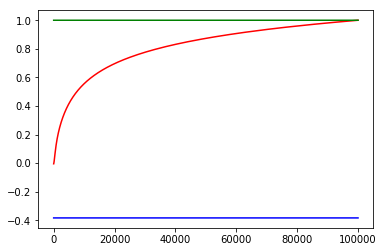

In [17]:
w1s= []
w2s = []
w3s = []
sess.run(init)
for i in range(100000):
    sess.run(train_step, feed_dict={x: X, y_: Y})
    w1s += [sess.run(W_layer1)]
    w2s += [sess.run(W_layer2)]
    w3s += [sess.run(W_layer3)]

W1 = w1s[-1]
W2 = w2s[-1]
W3 = w2s[-1]

l1 = [np.mean(w / W1) for w in w1s]
l2 = [np.mean(w / W2) for w in w2s]
l3 = [np.mean(w / W2) for w in w3s]

x = range(100000)


plt.plot(x, l1, 'r-')
plt.plot(x, l2, 'g-') 
plt.plot(x, l3, 'b-') 
plt.show()


In [18]:
sess.close()